In [1]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!pip install -U yellowbrick
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

plt.style.use('classic')
matplotlib.rcParams['figure.figsize'] = (10, 10)

In [ ]:
!pip install texthero
from texthero import preprocessing

In [4]:
import pandas as pd
import texthero as hero
from texthero import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [76]:
cols = ['EventDescription','IncidentCause','IncidentConsequence','Category']
df = pd.read_csv('/content/cleaned_incidents1.csv', usecols= cols)
df = df.dropna(subset=['Category'])
df['Description'] = df['EventDescription'] + ' '+ df['IncidentCause']+ ' ' + df['IncidentConsequence']
df['clean_description'] = hero.clean(df['Description'])
#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   #, preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]
#pass the custom_pipeline to the pipeline argument
df['clean_description'] = hero.clean(df['Description'], pipeline = custom_pipeline)
Y = LabelEncoder().fit_transform(df['Category'])


tf_5000 = TfidfVectorizer(analyzer='word', max_features=250)
tf_5000.fit(df['clean_description'])
#pickle.dump(tf_5000, open("tf_5000.pickle", "wb"))

x_train, x_test, y_train, y_test = train_test_split(df['clean_description'], Y, random_state=1, test_size=0.25, stratify=Y, shuffle=True)


train_tfidf = tf_5000.transform(x_train)
test_tfidf = tf_5000.transform(x_test)
print(train_tfidf.shape, test_tfidf.shape)

oversample = SMOTE(random_state=0,n_jobs=-1,k_neighbors=5)
x_train, y_train = oversample.fit_resample(train_tfidf, y_train)


svc = SVC(C=10.0, kernel = 'linear', tol=0.001)
svc.fit(x_train, y_train)
y_pred = svc.predict(test_tfidf)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


'''
#strength of regularization is inversely proportional to C

svc1 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False,
                       C = 1.0)

svc1.fit(x_train, y_train)
y_pred = svc1.predict(test_tfidf)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

'''

(4866, 250) (1623, 250)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



0.7603203943314849
              precision    recall  f1-score   support

           0       0.39      0.48      0.43        95
           1       0.65      0.79      0.71        70
           2       0.35      0.38      0.36        47
           3       0.76      0.72      0.74       226
           4       0.85      0.82      0.83       119
           5       0.83      0.89      0.86        96
           6       0.82      0.79      0.80       108
           7       0.25      0.29      0.27         7
           8       0.86      0.84      0.85        37
           9       0.52      0.57      0.54        54
          10       0.86      0.80      0.83       330
          11       0.64      0.63      0.64        82
          12       0.89      0.87      0.88       142
          13       1.00      0.17      0.29         6
          14       0.89      0.89      0.89       204

    accuracy                           0.76      1623
   macro avg       0.70      0.66      0.66      1623
weighte

"\n#strength of regularization is inversely proportional to C\n\nsvc1 = LinearSVC(penalty='l2', loss='squared_hinge', dual=False,\n                       C = 1.0)\n\nsvc1.fit(x_train, y_train)\ny_pred = svc1.predict(test_tfidf)\nprint(accuracy_score(y_test,y_pred))\nprint(classification_report(y_test,y_pred))\n\n"

In [69]:
print(y_test.shape, y_pred.shape)

(1623,) (1623,)


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

print(precision_score(y_test,y_pred, average='micro'))
print(f1_score(y_test,y_pred, average='micro'))
print(recall_score(y_test,y_pred, average='micro'))

0.7603203943314849
0.7603203943314849
0.7603203943314849


In [71]:
plt.style.use('classic')
matplotlib.rcParams['figure.figsize'] = (20, 10)

def model_evaluation(model, x_train, y_train, x_test, y_test, model_name, y_pred):
    """:arg
    :model, classifier, must have .fit() and .predict()
    :x_train, X, features
    :y_train, y, target
    :x_test, test features
    :y_test, test target
    :model_name, name of the classifier, string
    :y_pred, prediction made by classifier
    """
    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'The accuracy for {model_name}: {acc}')

    # F-measure
    f1score = f1_score(y_test, y_pred, average='micro')
    print(f'F-Measure for {model_name}: {f1score}')

    # classification report
    cls_report = classification_report(y_test, y_pred)
    print(cls_report)

    # Generate confusion matrix
    matrix = plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
    plt.title(f'Confusion matrix for {model_name} classifier')
    plt.xticks(rotation=65)
    plt.show(matrix)
    plt.show()

    # precision recall curve
    # Create the visualizer, fit, score, and show it
    viz = PrecisionRecallCurve(
        model,
        per_class=True,
        cmap="Set1"
    )
    viz.fit(x_train, y_train)
    viz.score(x_test, y_test)
    viz.show()

    # class prediction error
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(
        model
    )

    # Fit the training data to the visualizer
    visualizer.fit(x_train, y_train)

    # Evaluate the model on the test data
    visualizer.score(x_test, y_test)

    # Draw visualization
    visualizer.show()

    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=10)
    sizes = np.linspace(0.3, 1.0, 10)

    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(
        model, cv=cv, scoring='f1_micro', train_sizes=sizes, n_jobs=4
    )

    visualizer.fit(x_train, y_train)        # Fit the data to the visualizer
    visualizer.show()

    # learning curve with train and test data
    plot_learning_curves(x_train, y_train, x_test, y_test, model, train_marker='o', test_marker='^',
                     scoring='misclassification error', suppress_plot=False, print_model=True, legend_loc='best')


The accuracy for svc: 0.7603203943314849
F-Measure for svc: 0.7603203943314849
              precision    recall  f1-score   support

           0       0.39      0.48      0.43        95
           1       0.65      0.79      0.71        70
           2       0.35      0.38      0.36        47
           3       0.76      0.72      0.74       226
           4       0.85      0.82      0.83       119
           5       0.83      0.89      0.86        96
           6       0.82      0.79      0.80       108
           7       0.25      0.29      0.27         7
           8       0.86      0.84      0.85        37
           9       0.52      0.57      0.54        54
          10       0.86      0.80      0.83       330
          11       0.64      0.63      0.64        82
          12       0.89      0.87      0.88       142
          13       1.00      0.17      0.29         6
          14       0.89      0.89      0.89       204

    accuracy                           0.76      1623
 

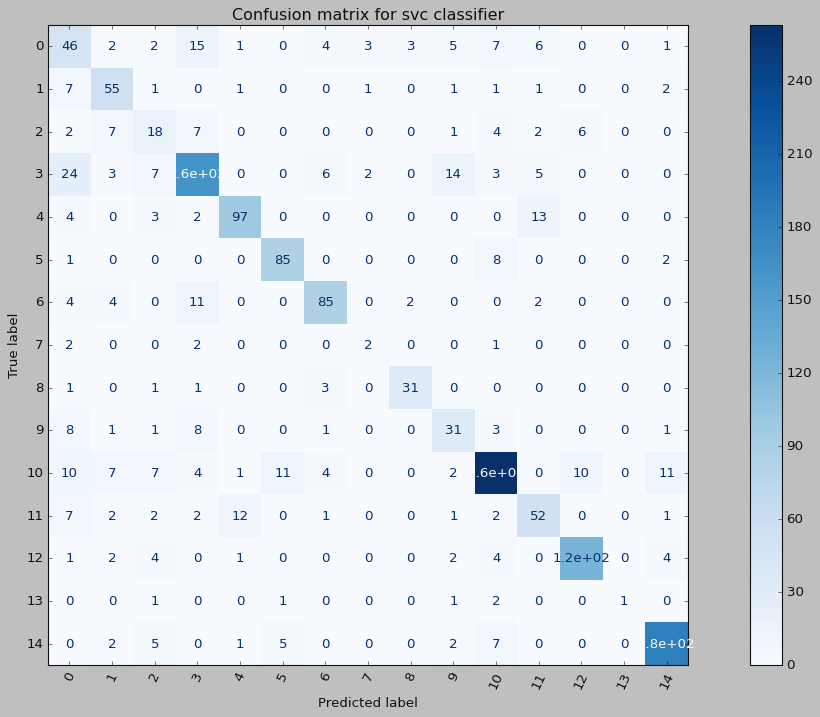

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.6/dist-packages/yellowbrick/classifier/prcurve.py:259: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging



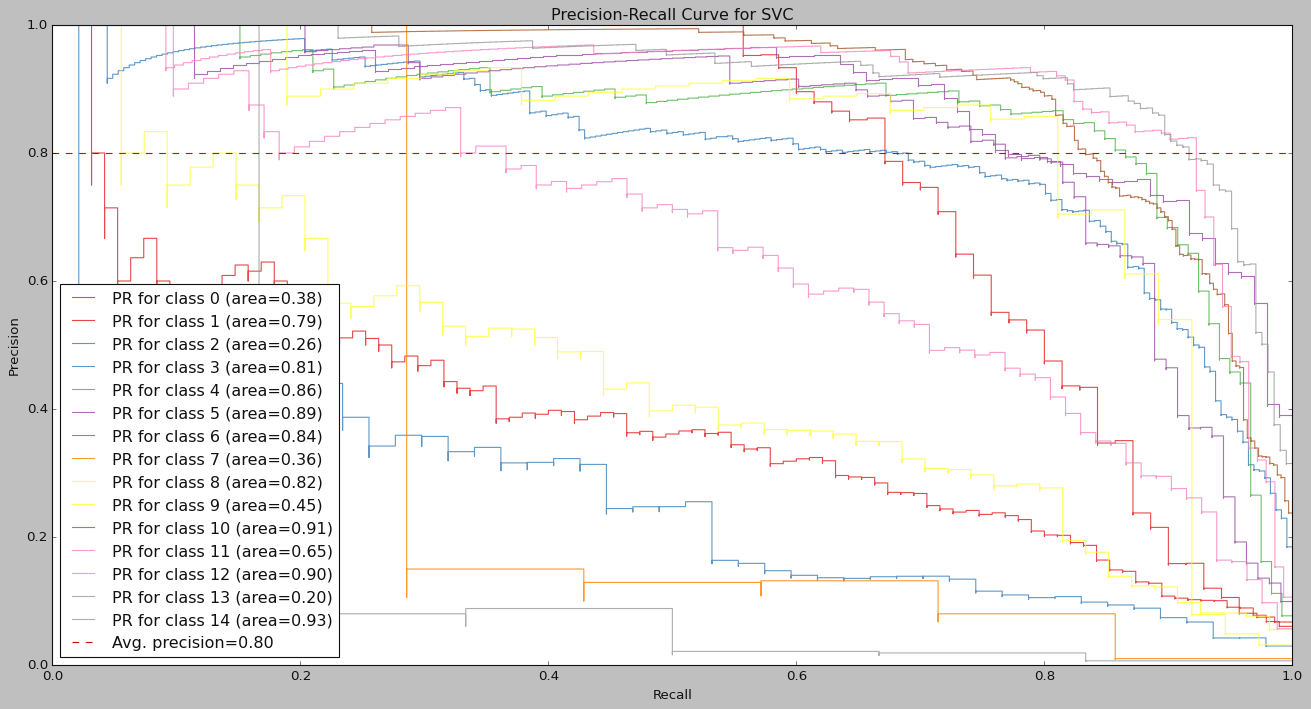

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



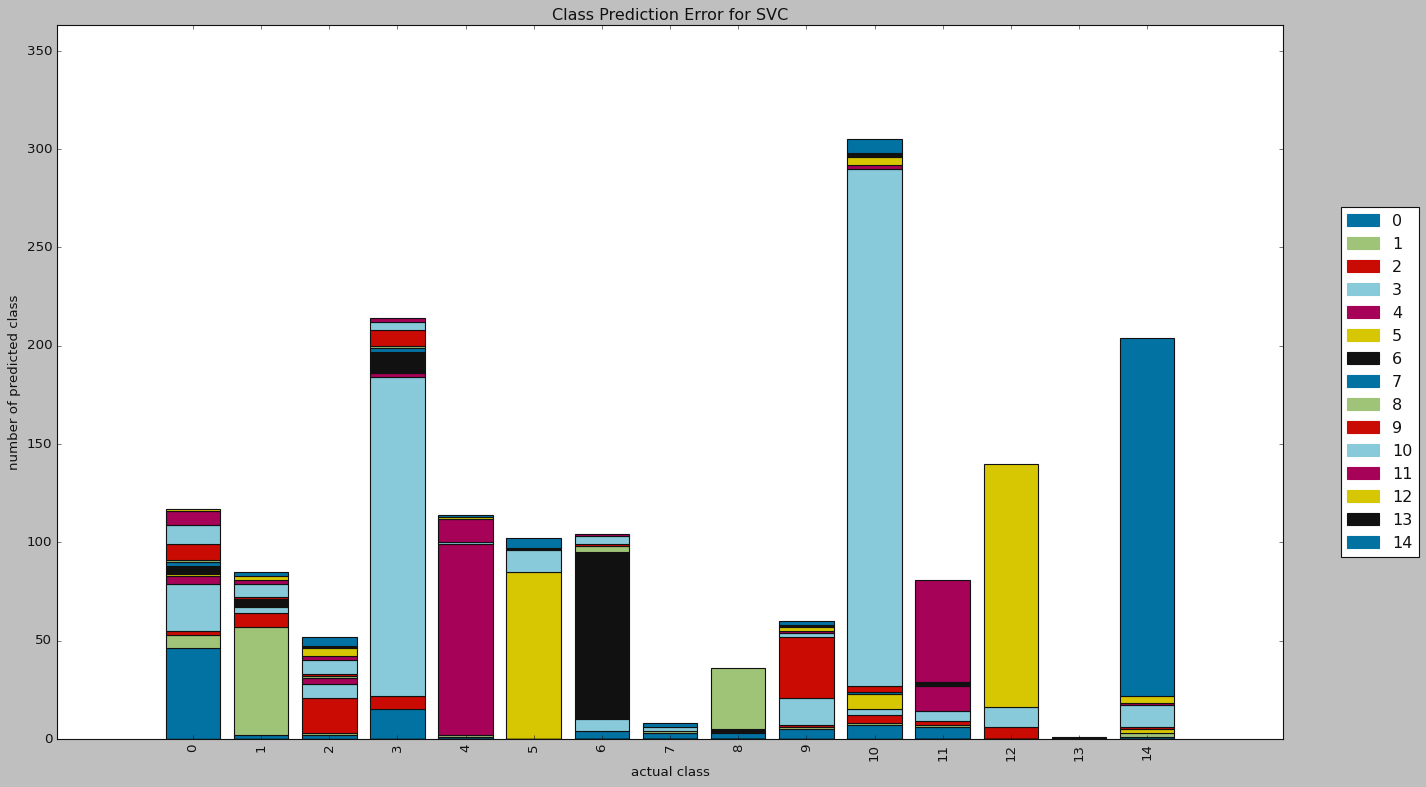

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



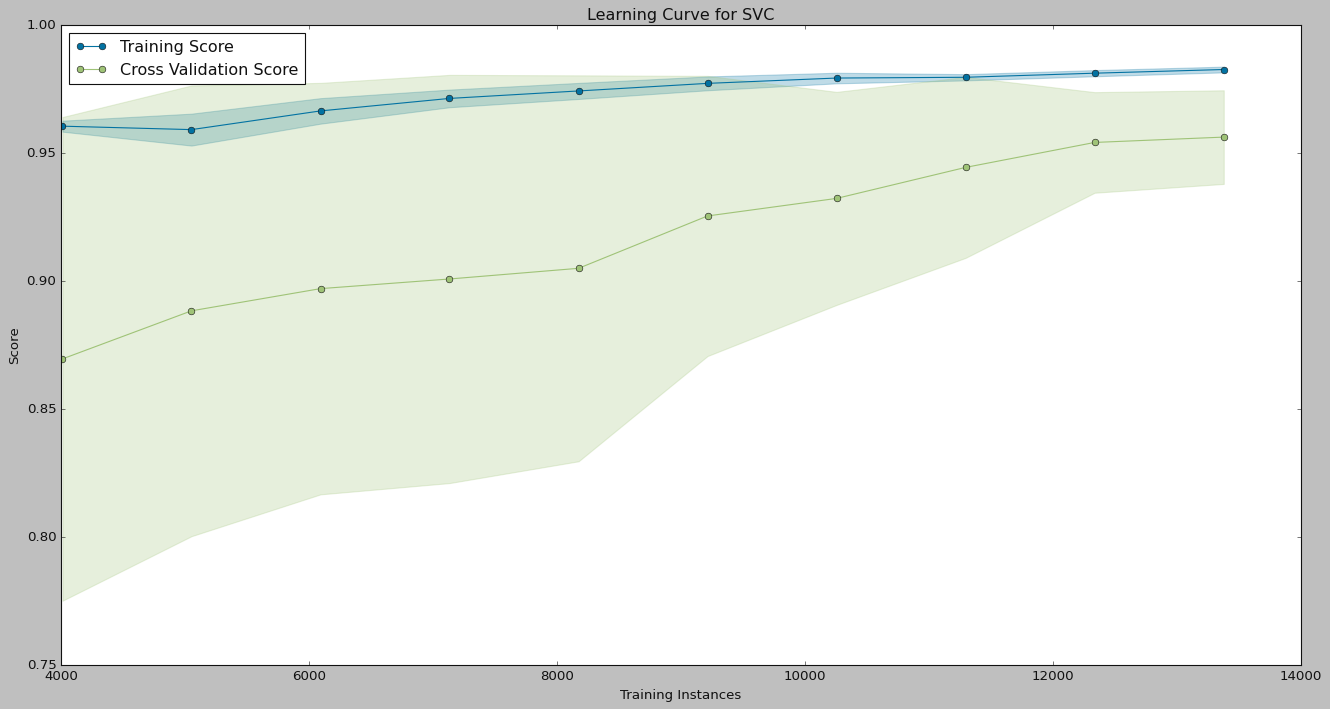

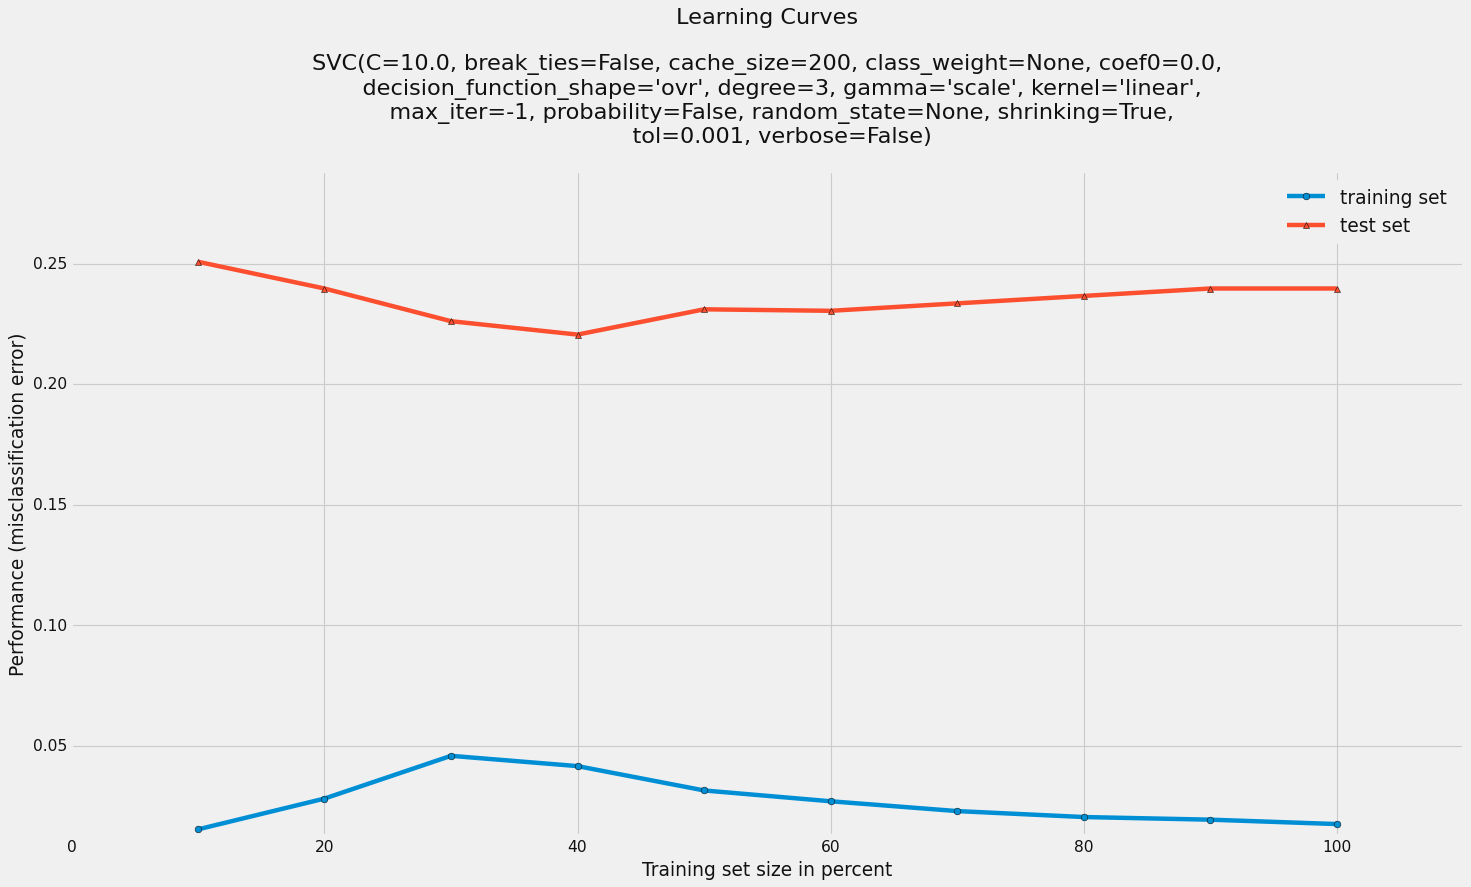

In [72]:
model_evaluation(svc, x_train, y_train, test_tfidf, y_test, 'svc', y_pred)

In [ ]:
'''
Insights for SVC: 

first attempt: max features 250,  C = 10.0
From the learning curves (error learning curve),the test error is higher than train set error (large gap) which means 
the high variance. 

In the score learning curve the training curve is flat after certain time, that means it stopped learning. 
Therefore it is again regarded as overfitted/high variance. 

As the next step I tried reducing the regularization parameter C (as C is inverse of regularization). 
Also, tried adjusting the feature numbers. 


Adjusting the max features to higher figure makes no good. As the minority classes predictions become zero. 
So the optimum is 250 features.

I tried running linear svc with penalty l2 and max features 100, the model was underfitted by then, as the curves were stuck in 70s f1 score



So going back to C = 10 and max features 250 as of now. 

'''